In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df=pd.read_csv("sales - sales.csv")
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [62]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [63]:
df.drop(["Outlet_Size","Item_Weight"],inplace=True,axis=1)

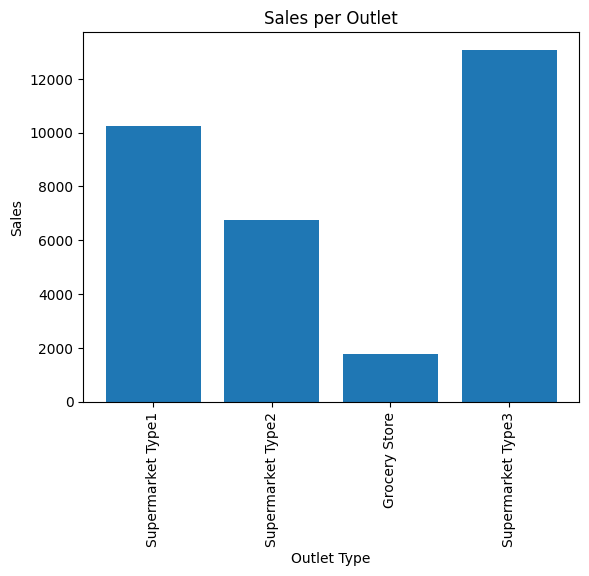

In [64]:
plt.bar(df.Outlet_Type,df.Item_Outlet_Sales)  
plt.xticks(rotation=90)
plt.xlabel("Outlet Type")
plt.ylabel("Sales")
plt.title("Sales per Outlet")
plt.show()


In [65]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [66]:
df.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [67]:
df.drop("Item_Identifier",inplace=True,axis=1)

In [68]:
X=df.drop("Item_Outlet_Sales",axis=1)
y=df["Item_Outlet_Sales"]

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse_output=False)
X_train_en = ohe.fit_transform(X_train[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type',
'Outlet_Type']])
X_test_en = ohe.fit_transform(X_test[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type',
'Outlet_Type']])


In [102]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [104]:
reg.fit(X_train_en,y_train)

LinearRegression()

In [106]:
y_predict=reg.predict(X_test_en)
y_pre

In [108]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test,y_predict))
print('MSE:', metrics.mean_squared_error(y_test,y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE: 1065.6662231085043
MSE: 1993253.0926196151
RMSE: 1411.8261552399485


0.2319978531808169